<a href="https://colab.research.google.com/github/wurifah/Bisaai/blob/main/supervisedheartdesease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report


# Load Data

In [56]:
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [57]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.shape

(303, 14)

# Informasi data
Terdapat 303 observasi dan 14 kolom pada dataset

> Data pasien

*   age = umur pasien
*   sex = jenis kelamin
*   cp = chest pain type
*   trestbps = resting blood pressure
*   chol = serum cholestoral in mg/dl
*   fbs = fasting blood sugar > 120 mg/dl


*   restecg = resting electrocardiographic results (values 0,1,2)

*   thalach = maximum heart rate achieved
*   exang = exercise induced angina


*   oldpeak = oldpeak = ST depression induced by exercise relative to rest



*   slope = the slope of the peak exercise ST segment

*   ca = number of major vessels (0-3) colored by flourosopy
*   thal = thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


> Deteksi

*   target = 1 positif , 0 negatif


# Visualisasi data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


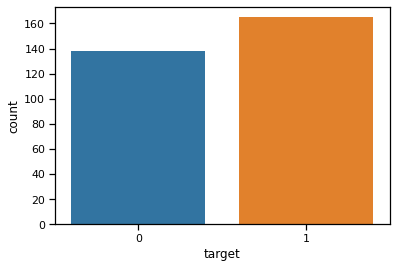

Presentase pasien tidak memiliki penyakit jantung : 45.54%
Presentase pasien memiliki penyakit jantung : 54.46%


In [95]:
f = plt.figure()
sns.countplot(df['target'])
plt.show()
countNoDisease = len(df[df.target ==0])
countHaveDisease = len(df[df.target ==1])
print('Presentase pasien tidak memiliki penyakit jantung : {:.2f}%'.format((countNoDisease / (len(df.target))*100)))
print('Presentase pasien memiliki penyakit jantung : {:.2f}%'.format((countHaveDisease / (len(df.target))*100)))

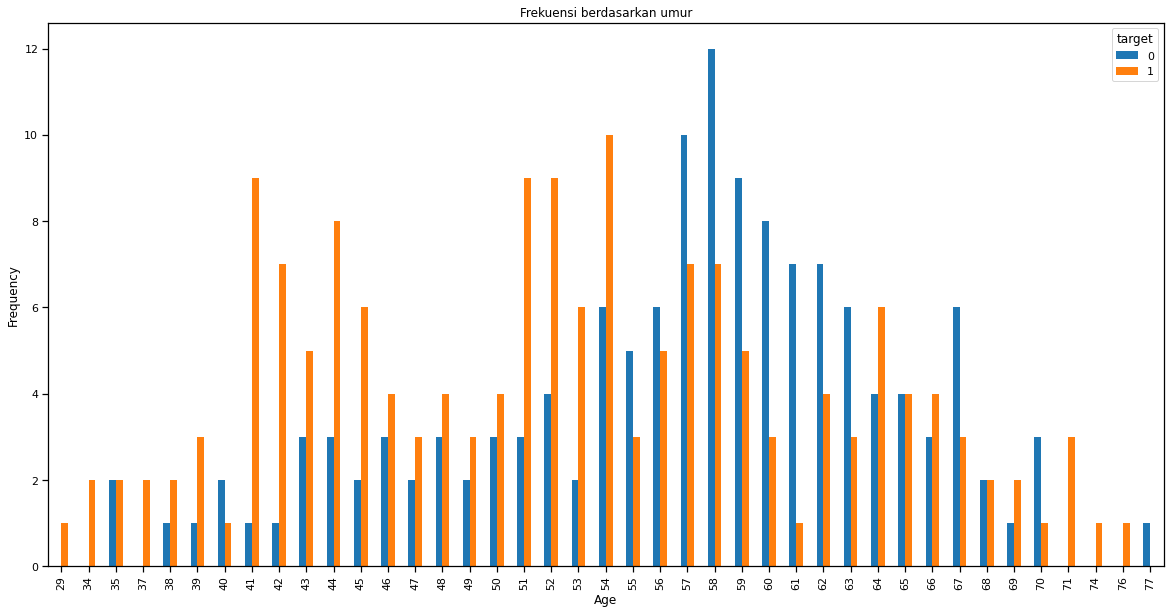

In [98]:
pd.crosstab(df.age , df.target).plot(kind = 'bar', figsize = (20,10))
plt.title('Frekuensi berdasarkan umur')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

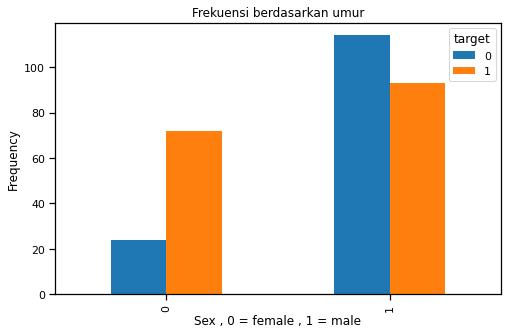

In [101]:
pd.crosstab(df.sex , df.target).plot(kind = 'bar', figsize = (8,5))
plt.title('Frekuensi berdasarkan umur')
plt.xlabel('Sex , 0 = female , 1 = male')
plt.ylabel('Frequency')
plt.show()

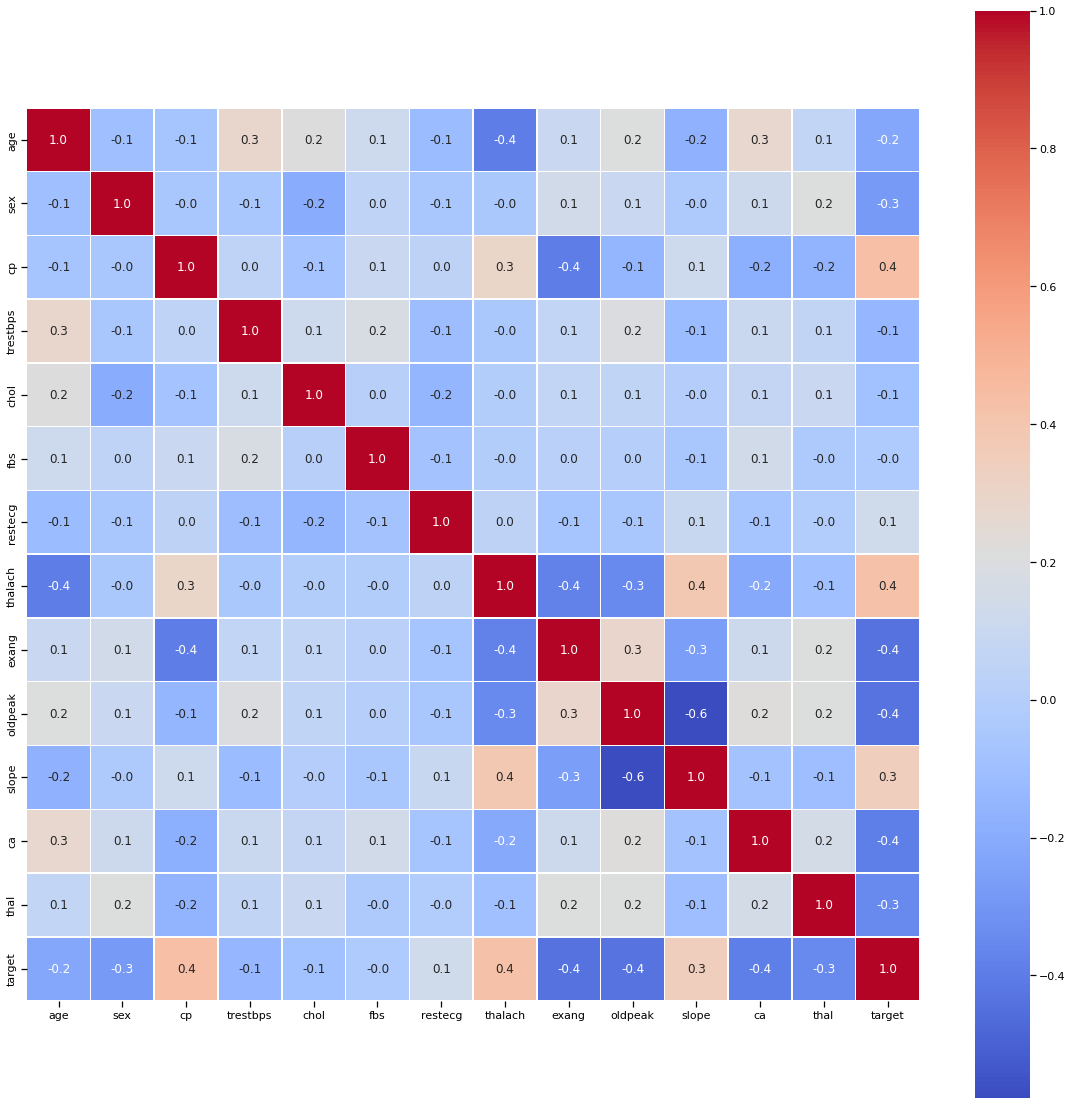

In [88]:
corr = df.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax);

# Pembuatan variavel x dan y

In [8]:
# membuat variabel x dan y
x = df.drop(columns='target')
y = df['target']

In [28]:
# split data menjadi data training dan data test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

In [89]:
print(f"Train features: {x_train.shape}")
print(f"Train target: {y_train.shape}")
print(f"Test features: {x_test.shape}")
print(f"Test target: {y_test.shape}")

Train features: (212, 13)
Train target: (212,)
Test features: (91, 13)
Test target: (91,)


# Linear Regresi

In [10]:
# membuat objek linear regression
lin_reg = LinearRegression()

#train model dengan data yang sudah di split
lin_reg.fit(x_train, y_train)

LinearRegression()

In [59]:
# mengetahui nilai slope
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-0.00370523 -0.22632895  0.11476491 -0.00193845 -0.0003526  -0.00383088
  0.05751955  0.00240495 -0.13066063 -0.04665544  0.0728556  -0.10623255
 -0.15918403]
1.1584671545735317


Pada linear regresi, persamaan umumnya adalah
## y = Ax + B
dimana:

y = dependent value

x = independent value

A = coefficient

B = intercept


Berdasarkan data diatas, maka beberapa persamaan regresi linearnya adalah sebagai berikut:

> Age

y = -0.00370523x + 1.1584671545735317



> Sex

y = -0.22632895x + 1.1584671545735317



> Chest pain test

y = 0.11476491x + 1.1584671545735317


dan sebagainya











In [145]:
# prediksi
y_pred = lin_reg.predict(x_test)

# cek akurasi
lrscore = lin_reg.score(x_test, y_test)
print('Model accuracy linear regression : ' , lrscore)

Model accuracy linear regression :  0.49514441926757813


In [134]:
hasil_prediksi = pd.DataFrame()
hasil_prediksi['Aktual'] = y_test.values.flatten()
hasil_prediksi['Linear Regression'] = y_pred.flatten()
hasil_prediksi['Linear Regression'] = hasil_prediksi['Linear Regression'].round(0)
hasil_prediksi.head(10)

,Aktual,Linear Regression
0,0,-0.0
1,0,0.0
2,1,1.0
3,1,1.0
4,1,1.0
5,1,0.0
6,1,0.0
7,1,1.0
8,1,0.0
9,1,1.0


## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [149]:
model_score = rf_clf.score(x_test, y_test)

In [150]:
print('Model Accuracy random forest:', model_score)

Model Accuracy random forest: 0.8131868131868132


In [151]:
rfpred = rf_clf.predict(x_test)

In [136]:
hasil_prediksi['Random Forest'] = rfpred.flatten()
hasil_prediksi['Random Forest'] = hasil_prediksi['Random Forest'].round(0)
hasil_prediksi.head(10)

,Aktual,Linear Regression,Random Forest
0,0,-0.0,0
1,0,0.0,0
2,1,1.0,1
3,1,1.0,1
4,1,1.0,1
5,1,0.0,0
6,1,0.0,0
7,1,1.0,0
8,1,0.0,0
9,1,1.0,1


## Decision Tree

In [29]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

In [30]:
dtc

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [37]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [38]:
predtree = dtc.predict(x_test)

In [147]:
dtscore = metrics.accuracy_score(y_test , predtree)
print('Model accuracy Decision Tree : ' , dtscore)

Model accuracy Decision Tree :  0.8021978021978022


In [137]:
hasil_prediksi['Decision Tree'] = predtree.flatten()
hasil_prediksi['Decision Tree'] = hasil_prediksi['Decision Tree'].round(0)
hasil_prediksi.head(10)

,Aktual,Linear Regression,Random Forest,Decision Tree
0,0,-0.0,0,0
1,0,0.0,0,0
2,1,1.0,1,1
3,1,1.0,1,1
4,1,1.0,1,1
5,1,0.0,0,0
6,1,0.0,0,0
7,1,1.0,0,1
8,1,0.0,0,0
9,1,1.0,1,1


## Naive Bayes

In [47]:
# Import model gaussian
modelnb = GaussianNB()

In [117]:
nbtrain = modelnb.fit(x_train, y_train)

In [118]:
# prediksi
nbpred = nbtrain.predict(x_test)

In [148]:
#cek akurasi
nbscore = metrics.accuracy_score(y_test , nbpred)
print('Model accuracy Naive Bayes : ' , nbscore)

Model accuracy Naive Bayes :  0.8351648351648352


In [138]:
hasil_prediksi['Naive Bayes'] = nbpred.flatten()
hasil_prediksi['Naive Bayes'] = hasil_prediksi['Naive Bayes'].round(0)
hasil_prediksi.head(10)

,Aktual,Linear Regression,Random Forest,Decision Tree,Naive Bayes
0,0,-0.0,0,0,0
1,0,0.0,0,0,0
2,1,1.0,1,1,1
3,1,1.0,1,1,1
4,1,1.0,1,1,1
5,1,0.0,0,0,0
6,1,0.0,0,0,0
7,1,1.0,0,1,0
8,1,0.0,0,0,0
9,1,1.0,1,1,1


In [152]:
# perbandingan akurasi
print('Model accuracy linear regression : ' , lrscore)
print('Model Accuracy random forest:', model_score)
print('Model accuracy Decision Tree : ' , dtscore)
print('Model accuracy Naive Bayes : ' , nbscore)

Model accuracy linear regression :  0.49514441926757813
Model Accuracy random forest: 0.8131868131868132
Model accuracy Decision Tree :  0.8021978021978022
Model accuracy Naive Bayes :  0.8351648351648352
